# Clustering

# How do we find similarities?

<img src=https://github.com/thanachart/ai-builders-tabular-data/raw/main/Images/61.png width="750px">

## K-Means Clustering

cr: https://www.youtube.com/watch?v=R2e3Ls9H_fc

<img src=https://github.com/thanachart/ai-builders-tabular-data/raw/main/Images/62.png width="750px">

<img src=https://github.com/thanachart/ai-builders-tabular-data/raw/main/Images/63.png width="750px">

<img src=https://github.com/thanachart/ai-builders-tabular-data/raw/main/Images/64.png width="750px">

<img src=https://github.com/thanachart/ai-builders-tabular-data/raw/main/Images/65.png width="750px">

<img src=https://github.com/thanachart/ai-builders-tabular-data/raw/main/Images/66.png width="750px">

<img src=https://github.com/thanachart/ai-builders-tabular-data/raw/main/Images/67.png width="750px">

<img src=https://github.com/thanachart/ai-builders-tabular-data/raw/main/Images/68.png width="750px">

<img src=https://github.com/thanachart/ai-builders-tabular-data/raw/main/Images/69.png width="750px">

<img src=https://github.com/thanachart/ai-builders-tabular-data/raw/main/Images/70.png width="750px">

<img src=https://github.com/thanachart/ai-builders-tabular-data/raw/main/Images/71.png width="750px">

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [ ]:
#Load data
url = 'https://github.com/thanachart/ai-builders-tabular-data/raw/main/Data/TelcoCustomers.csv'

df = pd.read_csv(url)

In [ ]:
#Preview file

df.head(5)

,phone number,international plan,voice mail plan,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,382-4657,0,1,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,371-7191,0,1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,358-1921,0,0,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,391-8027,1,0,118,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0
4,355-9993,0,1,121,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0


In [ ]:
##Preview data types

df.dtypes

phone number               object
international plan          int64
voice mail plan             int64
account length              int64
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                       int64
dtype: object

In [ ]:
col_types = list(zip(df.columns,df.dtypes.to_list()))
numeric_columns = list(df.select_dtypes(['int64','float64']).columns)
text_columns = list(df.select_dtypes(['object']).columns)

In [ ]:
##Define column role

id = 'phone number'

df.set_index(id)

,international plan,voice mail plan,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
phone number,,,,,,,,,,,,,,,,,,
382-4657,0,1,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
371-7191,0,1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
358-1921,0,0,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
391-8027,1,0,118,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0
355-9993,0,1,121,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351-2815,0,0,100,0,264.5,117,44.97,194.0,111,16.49,262.7,111,11.82,7.5,4,2.03,2,1
378-1884,0,0,121,0,255.1,93,43.37,266.9,97,22.69,197.7,118,8.90,8.8,3,2.38,3,1
384-6132,1,0,177,0,248.7,118,42.28,172.3,73,14.65,191.9,87,8.64,11.3,2,3.05,1,1


In [ ]:
##Check duplication of ID Columns

no_rows = df[id].count()
no_unique = df[id].nunique()
if no_rows != no_unique:
  print('\nDuplication Warning:')
  print(' The total records of ' + col + ' is ' + str(no_rows) +
        ' but the total number of distinct records is ' + str(no_unique))
else:
  print('\nNo Duplication Found in ID column')


No Duplication Found in ID column


In [ ]:
##Explore Text Columns

text_cols = list(set(df[text_columns]) - set(df[id]))
if len(text_cols) != 0:
    for i, col in enumerate(text_cols):
        print(col + ' has ' + str(df[col].nunique()) + ' distinct values')
else:
    print('\nThere is no text column')

phone number has 700 distinct values



Numerical columns: total eve calls, total night calls, number vmail messages, total day calls, international plan, total intl calls, total eve minutes, voice mail plan, total night charge, total intl minutes, total intl charge, churn, total night minutes, total day minutes, total eve charge, account length, customer service calls, total day charge

Summary Statistics of total eve calls
mean : 100.47
median : 101.0
std. dev. : 19.722


<ipython-input-9-9898520be3e6>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], color ='dimgray', hist_kws=dict(edgecolor="darkgray", linewidth=2, alpha=0.2), ax=ax_hist)


<Figure size 640x480 with 0 Axes>

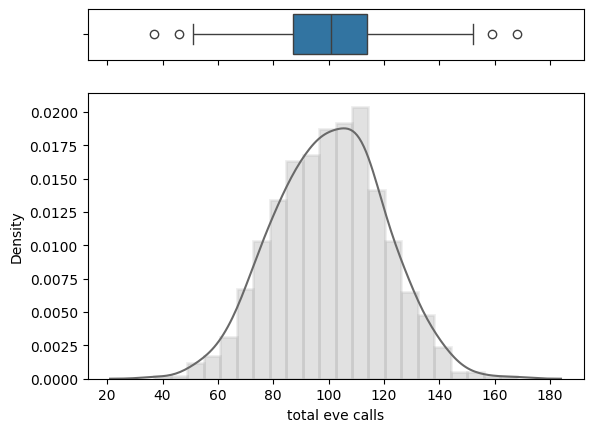


Summary Statistics of total night calls
mean : 100.03
median : 100.0
std. dev. : 19.644


<ipython-input-9-9898520be3e6>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], color ='dimgray', hist_kws=dict(edgecolor="darkgray", linewidth=2, alpha=0.2), ax=ax_hist)


<Figure size 640x480 with 0 Axes>

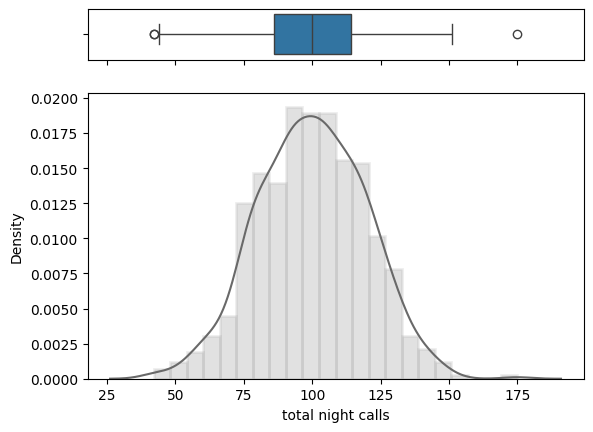


Summary Statistics of number vmail messages
mean : 7.48
median : 0.0
std. dev. : 13.216


<ipython-input-9-9898520be3e6>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], color ='dimgray', hist_kws=dict(edgecolor="darkgray", linewidth=2, alpha=0.2), ax=ax_hist)


<Figure size 640x480 with 0 Axes>

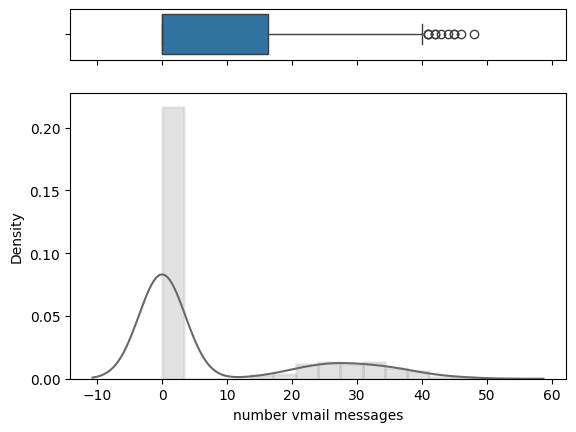


Summary Statistics of total day calls
mean : 101.22
median : 102.0
std. dev. : 19.567


<ipython-input-9-9898520be3e6>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], color ='dimgray', hist_kws=dict(edgecolor="darkgray", linewidth=2, alpha=0.2), ax=ax_hist)


<Figure size 640x480 with 0 Axes>

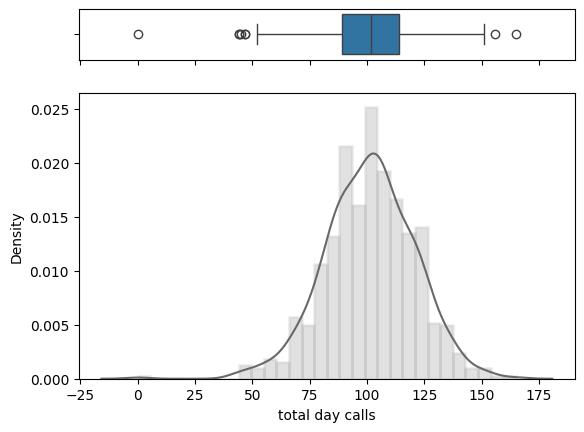


Summary Statistics of international plan
mean : 0.18
median : 0.0
std. dev. : 0.383


<ipython-input-9-9898520be3e6>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], color ='dimgray', hist_kws=dict(edgecolor="darkgray", linewidth=2, alpha=0.2), ax=ax_hist)


<Figure size 640x480 with 0 Axes>

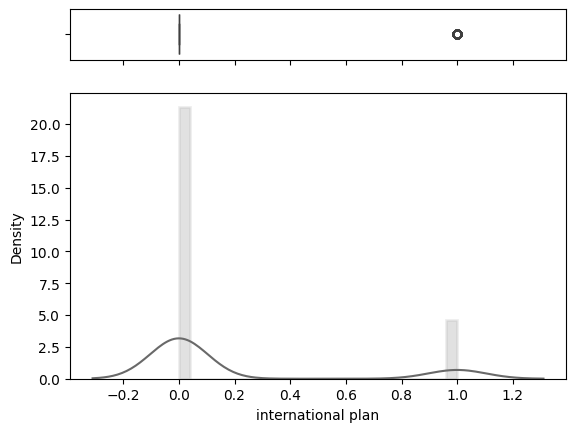


Summary Statistics of total intl calls
mean : 4.41
median : 4.0
std. dev. : 2.512


<ipython-input-9-9898520be3e6>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], color ='dimgray', hist_kws=dict(edgecolor="darkgray", linewidth=2, alpha=0.2), ax=ax_hist)


<Figure size 640x480 with 0 Axes>

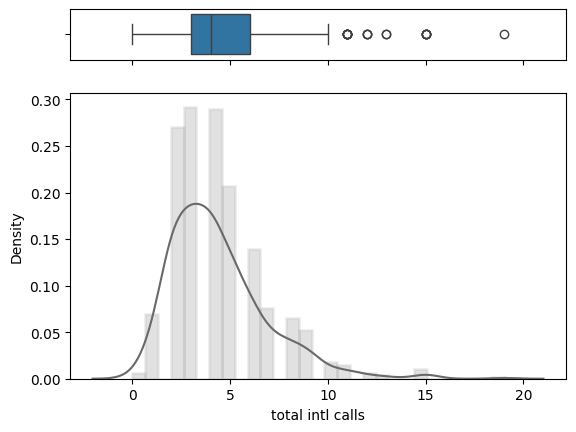


Summary Statistics of total eve minutes
mean : 203.17
median : 200.8
std. dev. : 54.018


<ipython-input-9-9898520be3e6>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], color ='dimgray', hist_kws=dict(edgecolor="darkgray", linewidth=2, alpha=0.2), ax=ax_hist)


<Figure size 640x480 with 0 Axes>

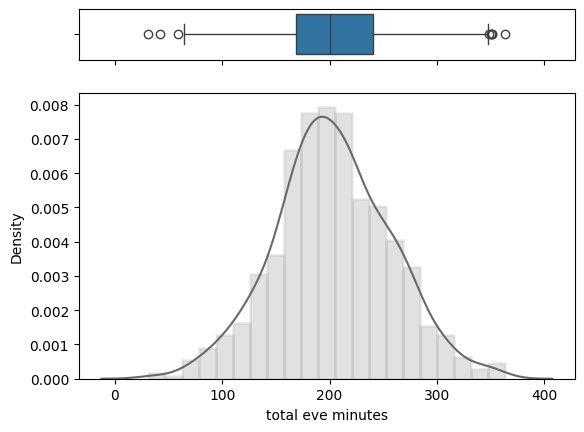


Summary Statistics of voice mail plan
mean : 0.26
median : 0.0
std. dev. : 0.437


<ipython-input-9-9898520be3e6>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], color ='dimgray', hist_kws=dict(edgecolor="darkgray", linewidth=2, alpha=0.2), ax=ax_hist)


<Figure size 640x480 with 0 Axes>

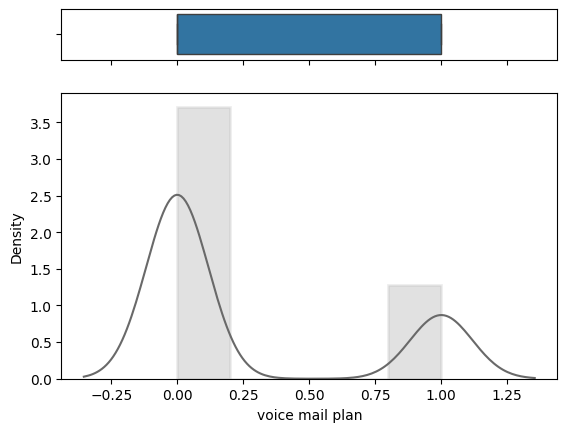


Summary Statistics of total night charge
mean : 9.09
median : 9.1
std. dev. : 2.202


<ipython-input-9-9898520be3e6>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], color ='dimgray', hist_kws=dict(edgecolor="darkgray", linewidth=2, alpha=0.2), ax=ax_hist)


<Figure size 640x480 with 0 Axes>

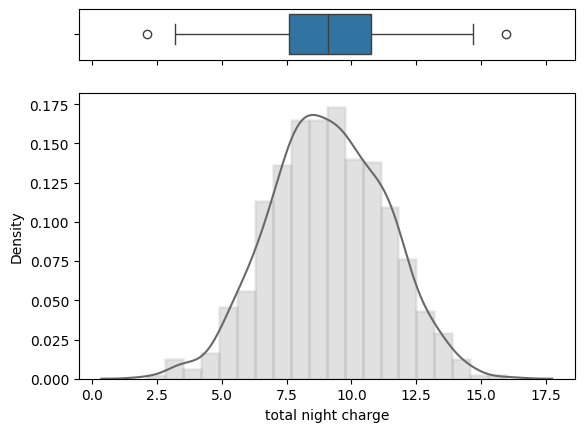


Summary Statistics of total intl minutes
mean : 10.44
median : 10.5
std. dev. : 2.753


<ipython-input-9-9898520be3e6>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], color ='dimgray', hist_kws=dict(edgecolor="darkgray", linewidth=2, alpha=0.2), ax=ax_hist)


<Figure size 640x480 with 0 Axes>

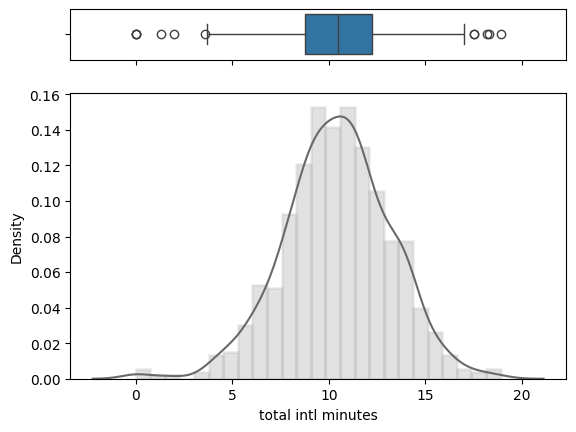


Summary Statistics of total intl charge
mean : 2.82
median : 2.84
std. dev. : 0.743


<ipython-input-9-9898520be3e6>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], color ='dimgray', hist_kws=dict(edgecolor="darkgray", linewidth=2, alpha=0.2), ax=ax_hist)


<Figure size 640x480 with 0 Axes>

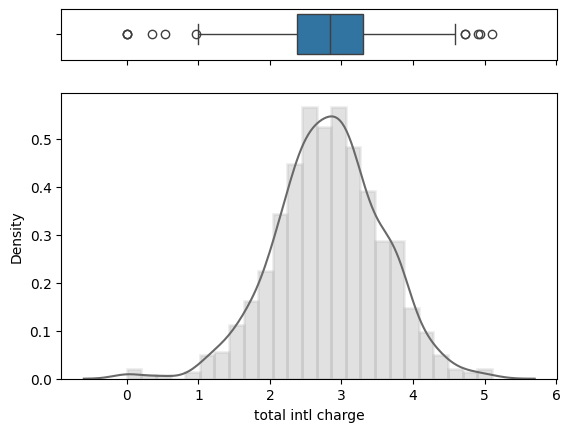


Summary Statistics of churn
mean : 0.43
median : 0.0
std. dev. : 0.495


<ipython-input-9-9898520be3e6>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], color ='dimgray', hist_kws=dict(edgecolor="darkgray", linewidth=2, alpha=0.2), ax=ax_hist)


<Figure size 640x480 with 0 Axes>

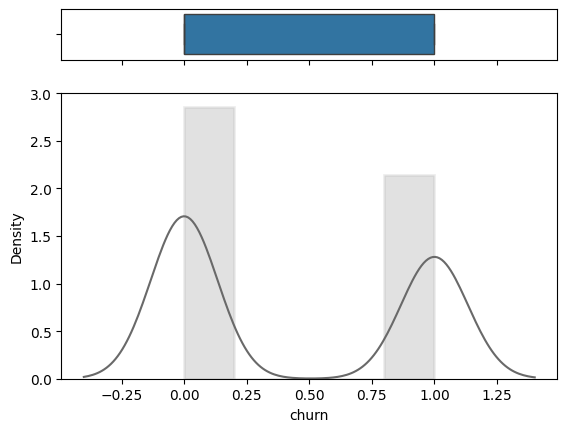


Summary Statistics of total night minutes
mean : 202.09
median : 202.3
std. dev. : 48.935


<ipython-input-9-9898520be3e6>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], color ='dimgray', hist_kws=dict(edgecolor="darkgray", linewidth=2, alpha=0.2), ax=ax_hist)


<Figure size 640x480 with 0 Axes>

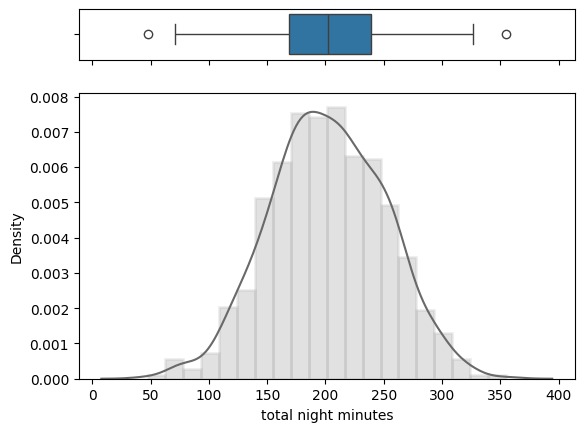


Summary Statistics of total day minutes
mean : 189.31
median : 189.55
std. dev. : 59.778


<ipython-input-9-9898520be3e6>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], color ='dimgray', hist_kws=dict(edgecolor="darkgray", linewidth=2, alpha=0.2), ax=ax_hist)


<Figure size 640x480 with 0 Axes>

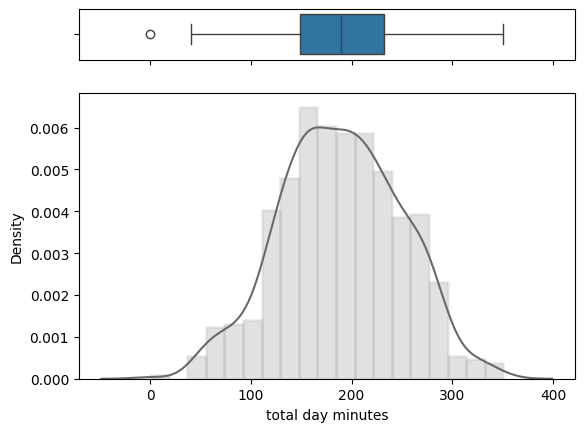


Summary Statistics of total eve charge
mean : 17.27
median : 17.07
std. dev. : 4.591


<ipython-input-9-9898520be3e6>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], color ='dimgray', hist_kws=dict(edgecolor="darkgray", linewidth=2, alpha=0.2), ax=ax_hist)


<Figure size 640x480 with 0 Axes>

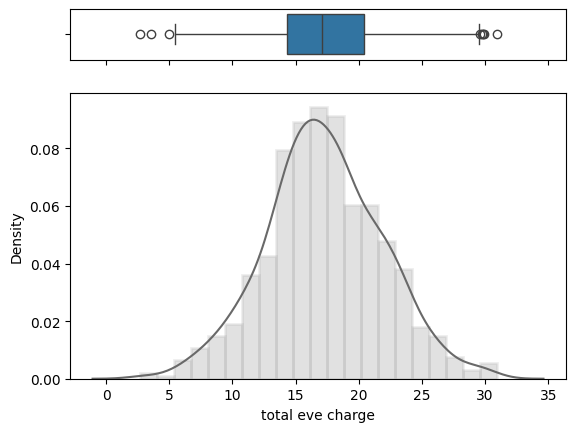


Summary Statistics of account length
mean : 125.93
median : 121.0
std. dev. : 26.407


<ipython-input-9-9898520be3e6>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], color ='dimgray', hist_kws=dict(edgecolor="darkgray", linewidth=2, alpha=0.2), ax=ax_hist)


<Figure size 640x480 with 0 Axes>

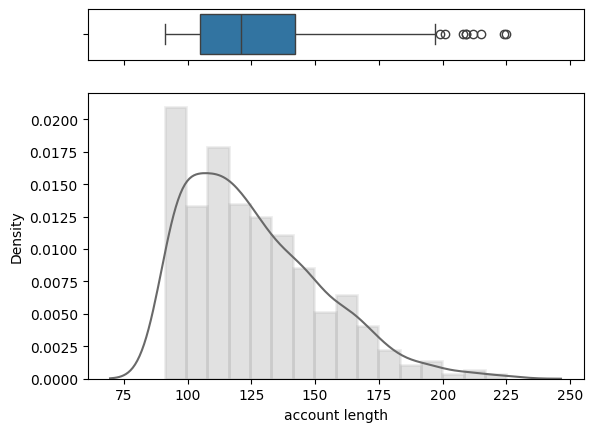


Summary Statistics of customer service calls
mean : 1.85
median : 1.0
std. dev. : 1.573


<ipython-input-9-9898520be3e6>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], color ='dimgray', hist_kws=dict(edgecolor="darkgray", linewidth=2, alpha=0.2), ax=ax_hist)


<Figure size 640x480 with 0 Axes>

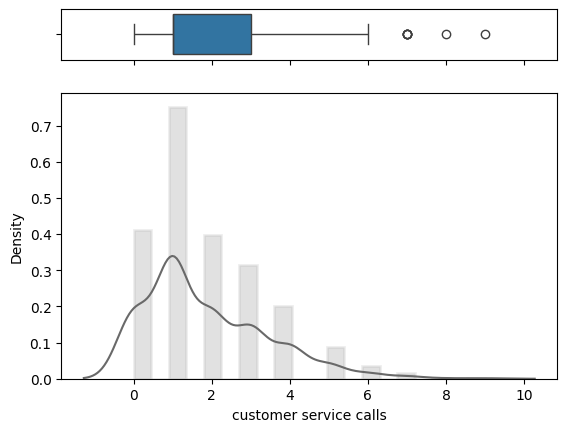


Summary Statistics of total day charge
mean : 32.18
median : 32.22
std. dev. : 10.162


<ipython-input-9-9898520be3e6>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], color ='dimgray', hist_kws=dict(edgecolor="darkgray", linewidth=2, alpha=0.2), ax=ax_hist)


<Figure size 640x480 with 0 Axes>

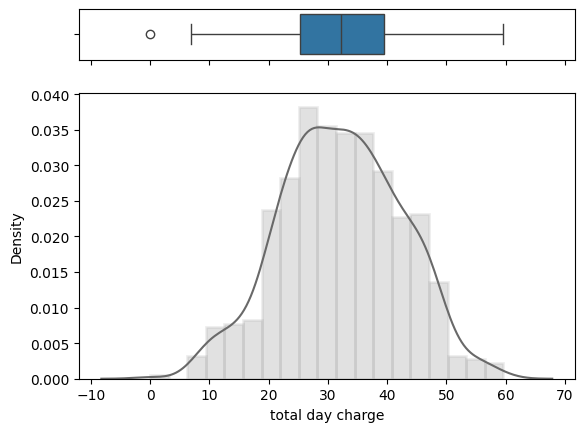

In [ ]:
##Explore Numeric Columns

numeric_cols = list(set(df[numeric_columns]) - set(df[id]))
if len(numeric_cols) != 0:

    print('\nNumerical columns: ' + ", ".join(numeric_cols))

    for i, col in enumerate(numeric_cols):
        print('\nSummary Statistics of ' + col)
        print('mean : ' + str(round(df[col].mean(), 2)))
        print('median : ' + str(round(df[col].median(), 2)))
        print('std. dev. : ' + str(round(df[col].std(), 3)))
        plt.figure(i)
        f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
        sns.distplot(df[col], color ='dimgray', hist_kws=dict(edgecolor="darkgray", linewidth=2, alpha=0.2), ax=ax_hist)
        sns.boxplot(x=df[col], ax=ax_box)
        plt.show()

else:
    print('\nThere is no numeric column')

In [ ]:
##Exclude unwanted variables

exclude_list = ['international plan', 'voice mail plan', 'churn']

numeric_cols = list(set(numeric_cols) - set(exclude_list))

In [ ]:
##Standardize data

df_std = pd.DataFrame(StandardScaler().fit_transform(df[numeric_cols]))

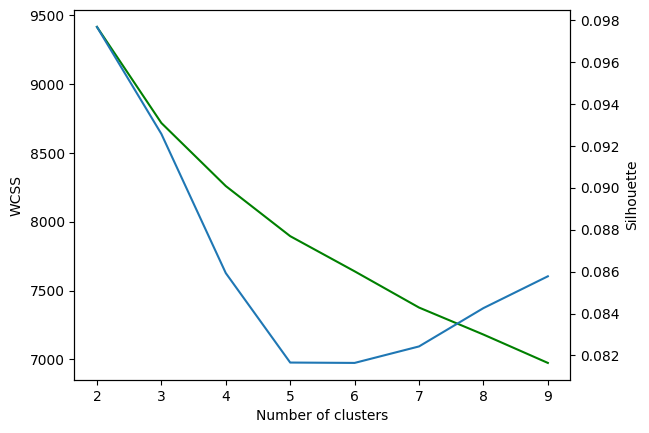

In [ ]:
k = 10
wcss=[]
sil=[]

for i in range(2,k):
     cluster = KMeans(n_clusters=i, init ='k-means++', max_iter=300,  n_init=10,random_state=0)
     cluster.fit_predict(df_std)
     wcss.append(cluster.inertia_)
     labels = cluster.labels_
     sil.append(silhouette_score(df_std, labels, metric = 'euclidean'))

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(range(2,k),wcss, label='WCSS', color='green')
ax2.plot(range(2,k), sil, label='Silhouette')

ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('WCSS')
ax2.set_ylabel('Silhouette')

plt.show()

In [ ]:
final_k = 5

final_cluster = KMeans(n_clusters=final_k, init ='k-means++', max_iter=300, n_init=10,random_state=0 )
final_cluster.fit_predict(df_std)
df['cluster'] = final_cluster.fit_predict(df_std)

In [ ]:
X = df[numeric_cols]
y = df['cluster']

clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X, y)
y_pred=clf.predict(X)

print("=== Confusion Matrix ===")
print(confusion_matrix(y, y_pred))
print('\n')
print("=== Classification Report ===")
print(classification_report(y, y_pred))


=== Confusion Matrix ===
[[ 68  10   8  24  13]
 [  3  91   6  12   4]
 [  1   4  97  13  20]
 [  1   2   0 141  17]
 [  0   3   2  15 145]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.93      0.55      0.69       123
           1       0.83      0.78      0.81       116
           2       0.86      0.72      0.78       135
           3       0.69      0.88      0.77       161
           4       0.73      0.88      0.80       165

    accuracy                           0.77       700
   macro avg       0.81      0.76      0.77       700
weighted avg       0.80      0.77      0.77       700



In [ ]:
featureImp = []

for feat, importance in zip(X.columns, clf.feature_importances_):
    temp = [feat, importance*100]
    featureImp.append(temp)

fT_df = pd.DataFrame(featureImp, columns = ['Feature', 'Importance'])

sorted_features = fT_df.sort_values('Importance', ascending = False)
sorted_features = sorted_features.reset_index()
print(sorted_features)

    index                 Feature  Importance
0       6       total day minutes   16.523603
1      12     total night minutes   16.313631
2      11      total night charge   16.012098
3      14        total day charge   13.795865
4       4       total intl charge   13.341940
5      10       total eve minutes   10.883176
6      13        total eve charge    5.753283
7       5      total intl minutes    4.837197
8       1   number vmail messages    1.274300
9       9       total night calls    0.333282
10      8  customer service calls    0.292788
11      7          account length    0.289251
12      0         total eve calls    0.186310
13      2         total day calls    0.121672
14      3        total intl calls    0.041606


<Figure size 640x480 with 0 Axes>

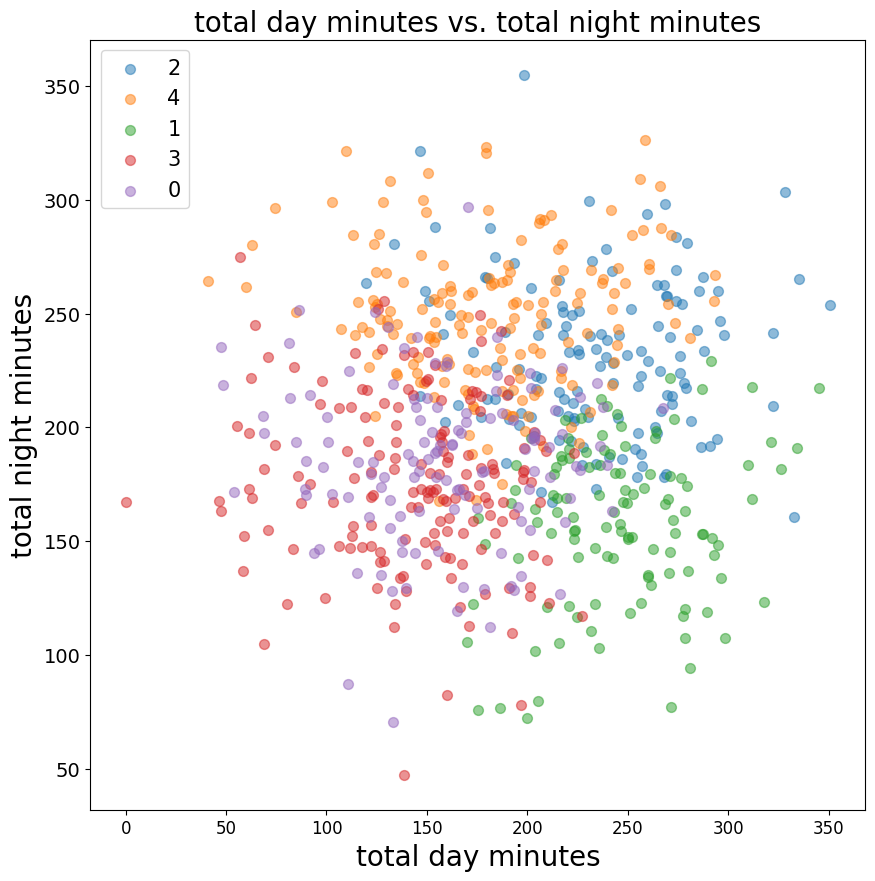

<Figure size 640x480 with 0 Axes>

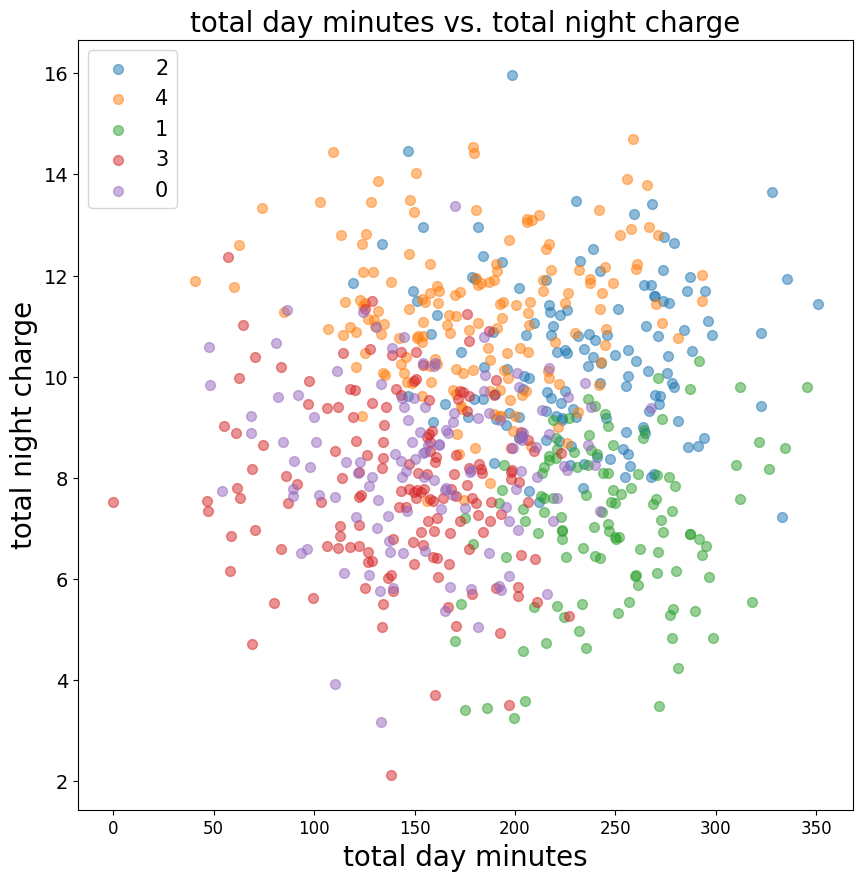

<Figure size 640x480 with 0 Axes>

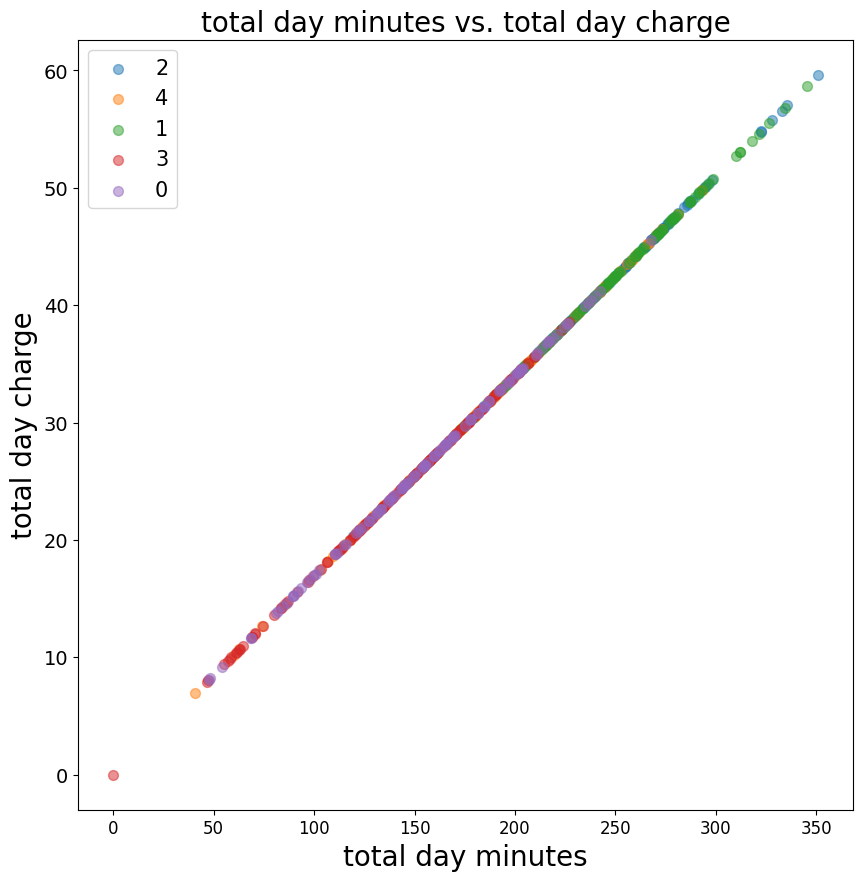

<Figure size 640x480 with 0 Axes>

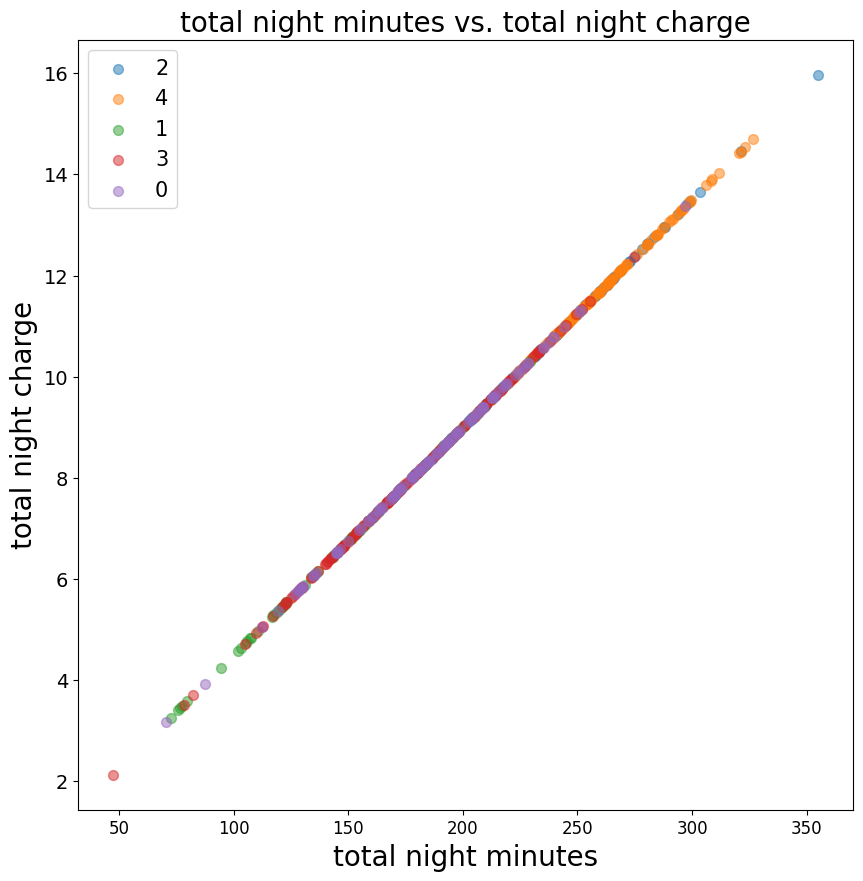

<Figure size 640x480 with 0 Axes>

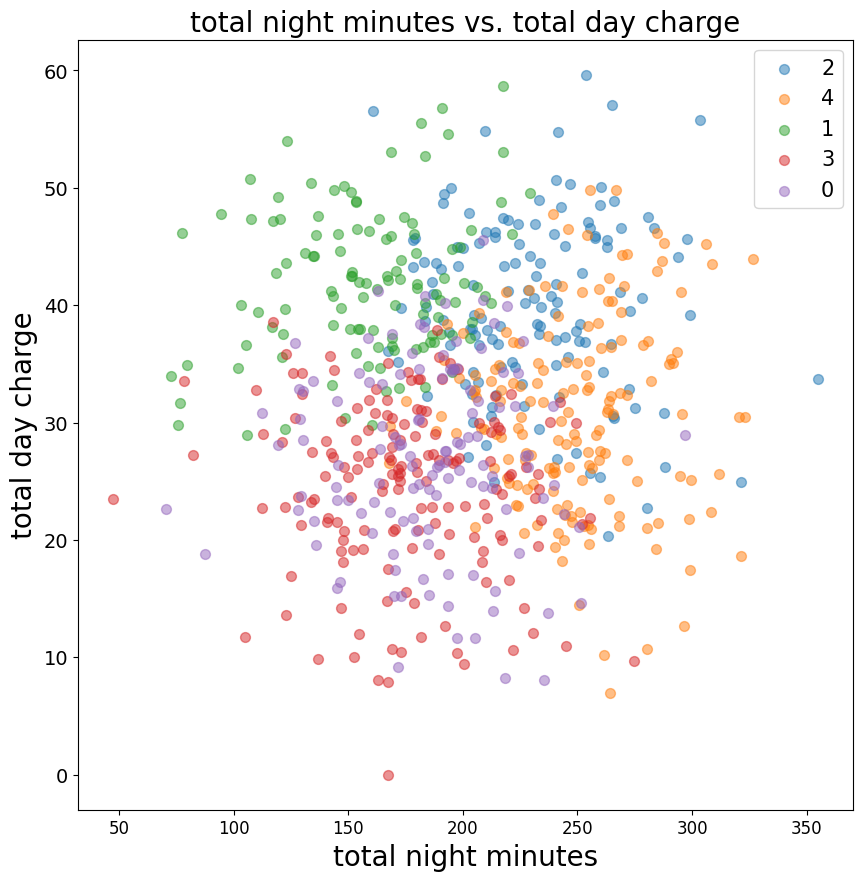

<Figure size 640x480 with 0 Axes>

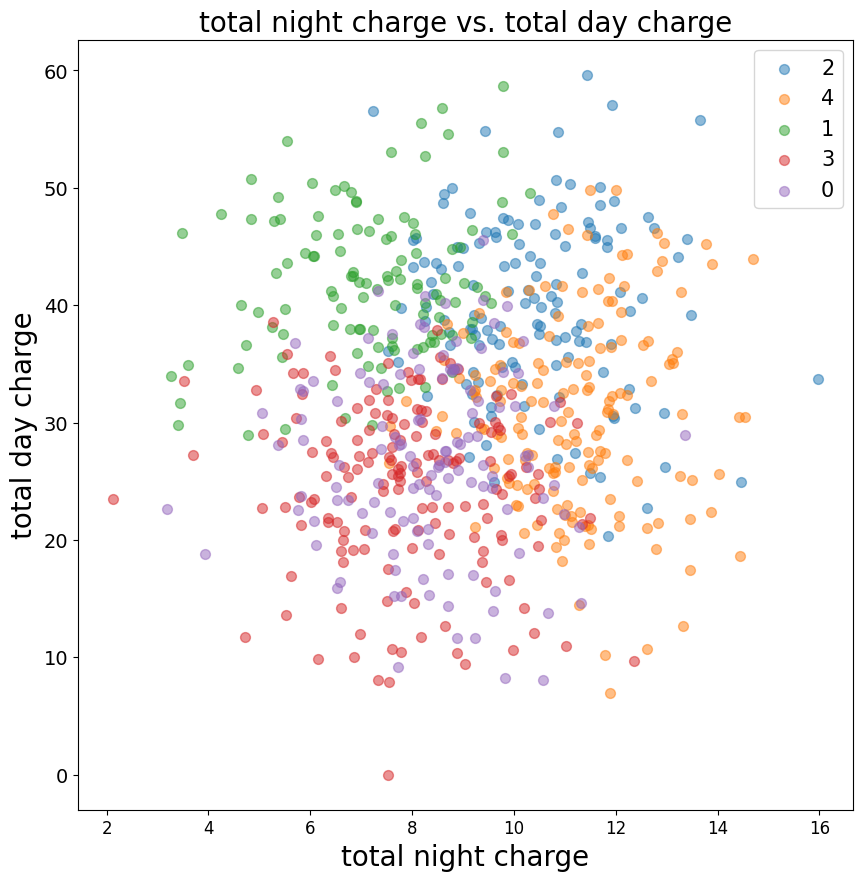

In [ ]:
n = 4

for i in range(0,n):
  for j in range(0,n):
    if (i != j) and (i < j):
      plt.figure()
      plt.figure(figsize=(10,10))
      plt.xticks(fontsize=12)
      plt.yticks(fontsize=14)
      plt.xlabel(sorted_features['Feature'][i],fontsize=20)
      plt.ylabel(sorted_features['Feature'][j],fontsize=20)
      plt.title(sorted_features['Feature'][i] + ' vs. ' + sorted_features['Feature'][j],fontsize=20)

      palette = itertools.cycle(sns.color_palette())
      cluster_name = df['cluster'].unique()
      for cluster in cluster_name:
          plt.scatter(df[sorted_features['Feature'][i]][df['cluster']==cluster]
                      , df[sorted_features['Feature'][j]][df['cluster']==cluster], s = 50, alpha=0.5
                      , color=next(palette))
      plt.legend(cluster_name,prop={'size': 15})
      plt.show()

In [ ]:
df.iloc[:,1:].groupby('cluster').agg('mean')

,international plan,voice mail plan,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
cluster,,,,,,,,,,,,,,,,,,
0,0.170732,0.162602,123.609756,4.634146,157.039837,102.089431,26.697317,257.230081,95.544715,21.864472,184.598374,98.414634,8.306504,11.919512,4.186992,3.218943,1.772358,0.406504
1,0.224138,0.206897,127.629310,6.258621,246.732759,96.965517,41.944914,193.900000,103.163793,16.481810,158.406897,96.129310,7.128534,11.183621,4.543103,3.020259,1.387931,0.396552
2,0.103704,0.133333,130.207407,3.940741,234.823704,103.311111,39.920593,237.406667,103.777778,20.179630,230.713333,100.251852,10.382593,8.259259,4.718519,2.231037,1.518519,0.622222
3,0.155280,0.254658,124.155280,7.018634,143.273292,101.254658,24.356770,164.477019,101.776398,13.981180,175.039752,100.720497,7.876957,8.756522,4.291925,2.364969,2.453416,0.409938
4,0.236364,0.466667,124.703030,13.824242,180.675758,101.836364,30.715515,179.120000,98.278788,15.225091,248.811515,103.103030,11.196727,12.261212,4.345455,3.311091,1.909091,0.327273


# Checkpoint ท้ายบท

*   ☑️ เข้าใจเทคนิคการวิเคราะห์ Clustering
*   ☑️ เข้าใจถึงกระบวนการในการนำ Clustering ไปใช้